##  도미 데이터 준비하기 

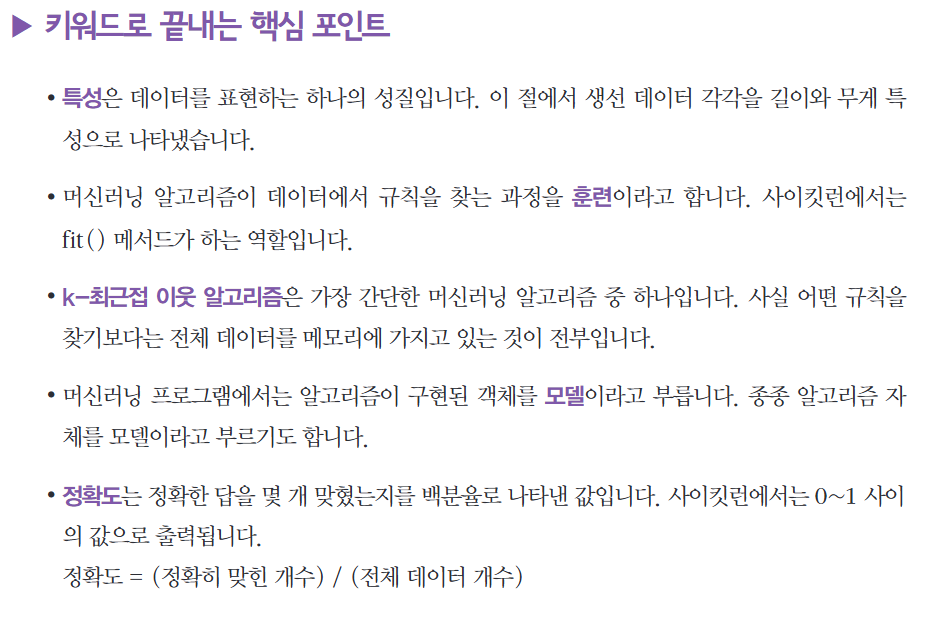

In [1]:
from IPython.display import Image, display
display(Image(filename="img/img04.png", width=600, height=400))

In [2]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

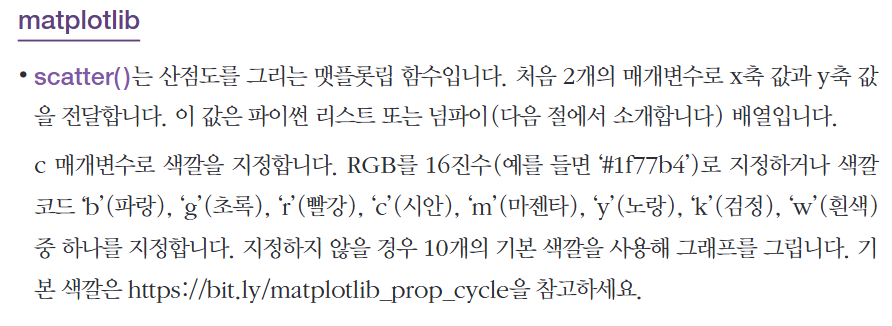

In [3]:
display(Image(filename="img/img05.png", width=600, height=400))

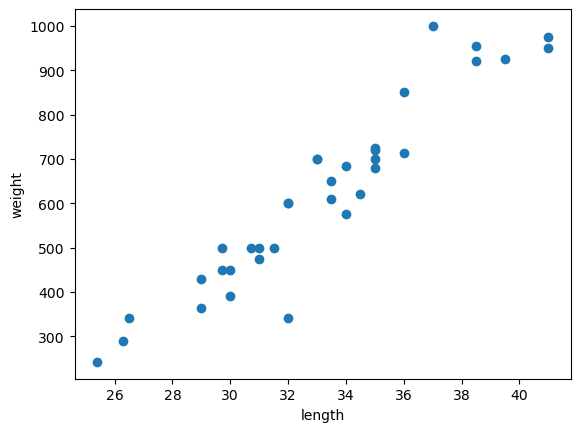

In [4]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 빙어 데이터 준비하기 

In [5]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

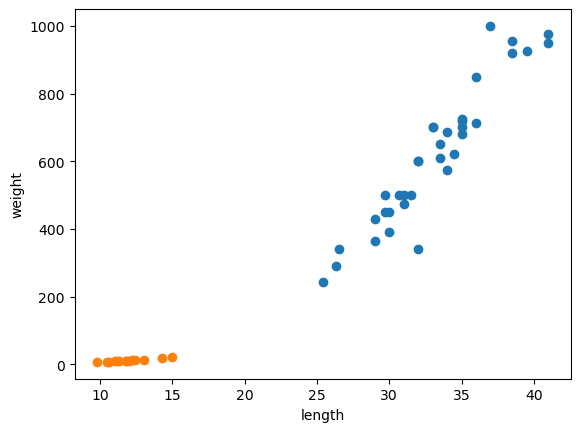

In [6]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 첫번째 머신러닝 프로그램

In [7]:
length = bream_length+smelt_length
weight = bream_weight+smelt_weight

In [8]:
# zip 함수는 여러 리스트를 묶어서 **튜플 형태로 쌍(pair)**을 만들어줍니다.
# length = [10, 20, 30], weight = [100, 200, 300]
# list(zip(length, weight)) => [(10, 100), (20, 200), (30, 300)]
# [l, w] for l, w in zip(...)]
# 리스트 내포(list comprehension) 문법입니다.
# 각 반복마다 [l, w]라는 리스트를 만듭니다.

fish_data = [[l, w] for l, w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


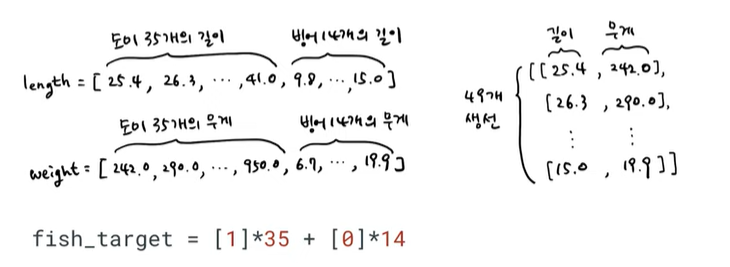

In [9]:
from IPython.display import Image, display
display(Image(filename="img/img02.png", width=500, height=500))

In [10]:
# 도미의 크기는 30-40 사이 이다.
# 도미를 1로 놓고 빙어는 0으로  (2진분류, 3개이면 0,1,2)
# 1이 도미 이다, 관심대상 
# fish_target 은 물고기의 정답 라벨 데이터를 만드는 코드입니다.
# 1 → 도미(또는 참치 등 특정 물고기) 35마리
# 0 → 빙어 14마리
# 즉, 총 49마리 물고기의 라벨(정답)이 들어 있는 리스트입니다.
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 사이킷런 패키지에서  k-최근접 이웃 알고리즘 구현한 클래스 KNeighborsClassifier import 하자

####  k-최근접 이웃 알고리즘 (KNN):
- 머신러닝에서 아주 기초적이면서도 직관적인 지도학습 분류(Classification)와 회귀(Regression) 알고리즘이에요.
- 새로운 데이터가 주어졌을 때, 그 데이터와 가장 가까운 k개의 이웃 데이터를 찾아서,
  다수결(분류) 또는 평균(회귀)으로 결과를 예측하는 방식이에요.
- 아래 그림에서 녹색원이 새로운 데이터이면 가장 가까운 k개(지금은 3개)선택 해서 같은 것으로 분류(지금은 빨간 삼각형)하는 것을 말한다.

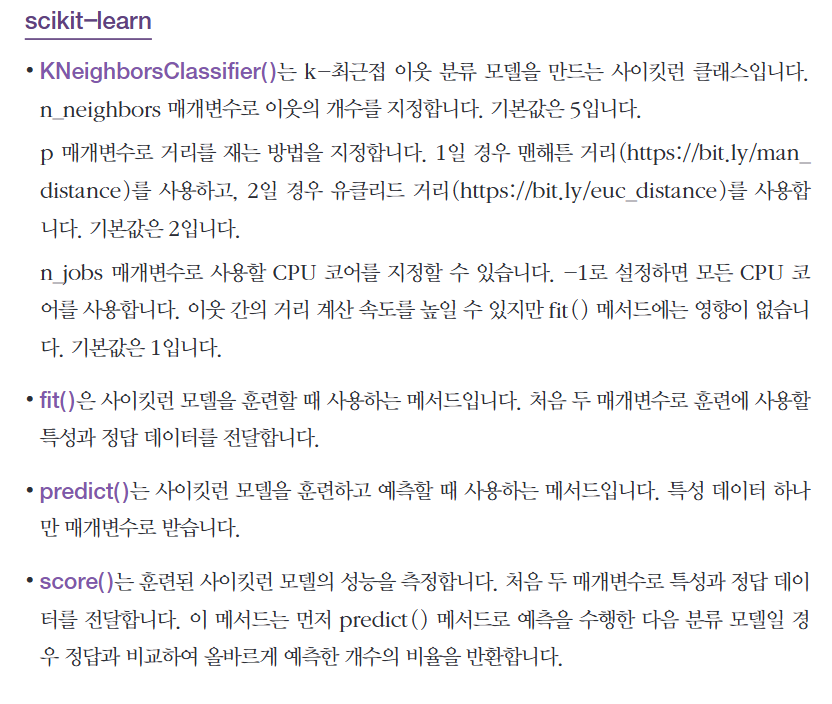

In [11]:
display(Image(filename="img/img06.png", width=600, height=400))

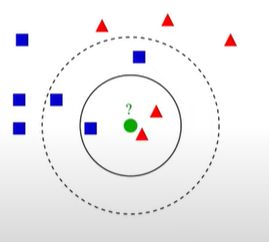

In [12]:
from IPython.display import Image, display
display(Image(filename="img/img03.png", width=300, height=200))

In [13]:
# (K-최근접 이웃(KNN, k-Nearest Neighbors) 알고리즘)
# fish_data : 입력 데이터 (예: [[길이, 무게], [길이, 무게], ...])
# fish_target : 정답 라벨 (예: 1=도미, 0=빙어 같은 구분)
# 주어진 데이터에 대해 예측한 값이 정답과 얼마나 일치하는지를 계산합니다.
# score = (맞힌 개수) / (전체 개수)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()              # 1. KNN 분류기 생성 (기본값: k=5)
kn.fit(fish_data, fish_target)           # 2. 학습 = 훈련 (특징=fish_data, 라벨=fish_target)
kn.score(fish_data, fish_target)         # 3. 학습 데이터에 대한 정확도 평가 

# 결과 : 분류 알고리즘 에서 1.0 은 100% 이다.

1.0

### 새로운 생선 예측 
- 길이가 30이고, 무게가 600인 객체 판별하기
- kn.predict([[30,600]])  # 중첩된 리스트로 전달(리스트 안에 리스트)
- array([1])

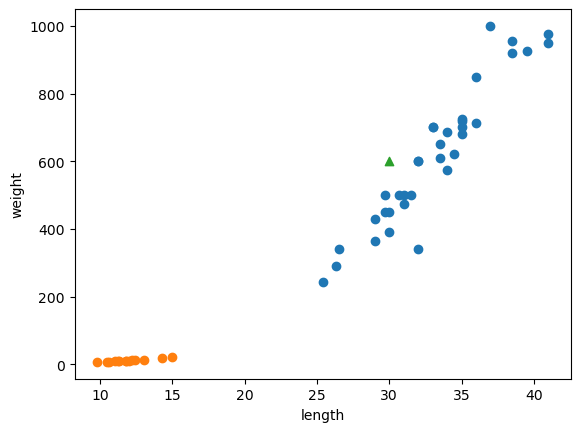

In [14]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [15]:
kn.predict([[30, 600]])

# 결과 : array([1])  => 1 이므로 도미로 분류 한다.

array([1])

In [16]:
# _fit_X 속성에는 fish_data 를 모두 가지고 있다.
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [17]:
# _y 속성에는 fish_target 를 모두 가지고 있다.
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [18]:
# KNeighborsClassifier 클래스의 기본값은 5이다 새로운 값 주위를 5개를 검사한다는 뜻이다.
# 그런데 이것을 49개로 변경해 보자 (n_neighbors 매개변수를 49개로 변경하자)
kn49 = KNeighborsClassifier(n_neighbors=49)

In [22]:
# 다시 훈련하고 정확도를 확인하면  (35/49) =>  0.7142857142857143
kn49.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=49)

In [23]:
kn49.score(fish_data, fish_target)

0.7142857142857143

In [24]:
# 35개가 도미이고 14개 방어이다. kn49 모델은 도미만 올바르게 맞히기 때문에 
print(35/49)

0.7142857142857143


### 확인 문제

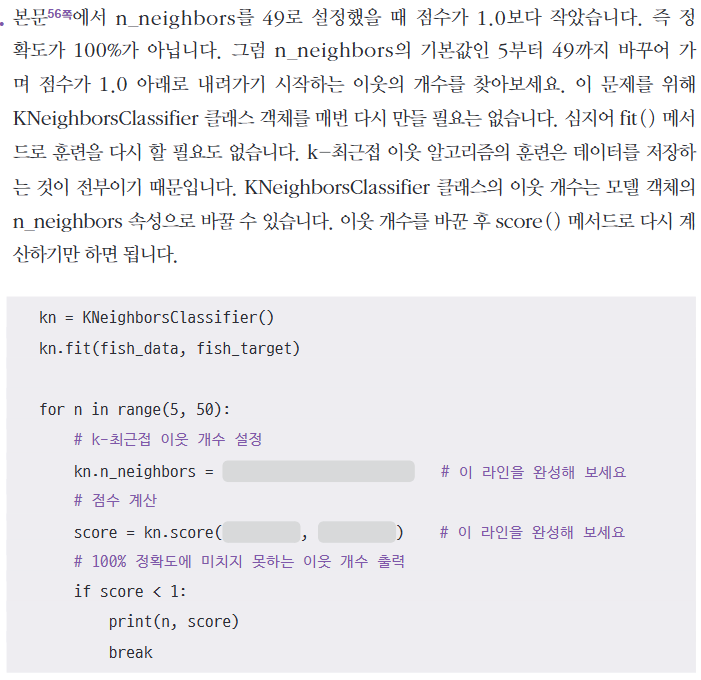

In [26]:
display(Image(filename="img/img07.png", width=600, height=600))

In [27]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
    # 최근접 이웃 개수 설정
    kn.n_neighbors = n
    # 점수 계산
    score = kn.score(fish_data, fish_target)
    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(n, score)
        break

18 0.9795918367346939
